# MCP for Finance - Stock Researcher Agent 

## Yahoo Finance Research MCP Tools 

In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
from dotenv import load_dotenv
load_dotenv()

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.agents import create_agent
from langchain_core.messages import HumanMessage

from langchain_core.tools import tool
from langchain.agents.middleware import TodoListMiddleware

import subprocess
import sys

In [10]:
@tool
def finance_researcher(query: str):
    """Research stocks using Yahoo Finance MCP async function.
    Call this tool whereever you need to answer finance related question"""

    code = f"""
import asyncio
from scripts.yahoo_mcp import finance_research
asyncio.run(finance_research("{query}"))
"""
    result = subprocess.run([sys.executable, '-c', code], capture_output=True, text=True)

    return result.stdout


In [11]:
query = "What is the current stock price and recent performance of Apple (AAPL)? Also show me the latest news."
response = finance_researcher.invoke({'query': query})

In [13]:
print(response)

Here's the information for Apple (AAPL):

**Current Stock Price:**
As of the latest data, Apple's current stock price is **$274.62 USD**.

**Recent Performance (Past Month):**
Apple's stock has shown positive growth over the past month.
*   On January 12, 2026, the closing price was $260.01.
*   On February 9, 2026, the closing price was $274.62.
This represents a **5.62% increase** in stock price over the last month.

**Latest News:**
Here are some of the latest news headlines regarding Apple:

*   **How Apple Is Winning the AI Race -- by Staying Out of It** (The Motley Fool) - Suggests buying Apple stock could cushion a portfolio against an AI sell-off.
*   **Apple and Google agree changes to make app stores and platforms ‘fairer’** (Yahoo Finance UK) - Both tech giants have agreed to commitments with the UK's Competition and Markets Authority to make app stores more transparent for developers.
*   **Memory Chip Squeeze Widens Gap Between Market Winners and Losers** (Yahoo Finance) -

## Stock Researcher Agent

### System Prompt

In [14]:
system_prompt = """You are a professional stock research analyst specializing in financial analysis.

**Your Responsibilities:**
1. Analyze stock performance and financial metrics
2. Research company fundamentals
3. Provide data-driven investment recommendations
4. You must use available tools to answer user queries

**Analysis Framework:**
- Company name and ticker symbol
- Current stock price
- Key metrics: P/E ratio, Market Cap, Revenue
- Financial health assessment
- Clear recommendation: Buy, Hold, or Sell

**Important Guidelines:**
- Only respond to finance and stock market related questions
- For non-finance questions, politely decline: "I apologize, but I can only assist with stock market and financial analysis questions. Please ask me about stocks, companies, or financial metrics."
- Always cite specific data and metrics
- Maintain professional and objective tone

Provide concise, actionable insights for investors."""

### Create Agent

In [15]:
from langchain.agents.middleware import TodoListMiddleware

model = ChatGoogleGenerativeAI(model='gemini-2.5-flash')

agent = create_agent(
    model=model,
    tools=[finance_researcher],
    system_prompt=system_prompt,
    middleware=[TodoListMiddleware()]
)

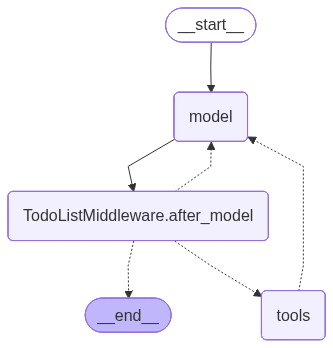

In [17]:
agent

### Run Agent

In [18]:
response = agent.invoke({'messages': [HumanMessage('what is the weather in London?')]})
response

{'messages': [HumanMessage(content='what is the weather in London?', additional_kwargs={}, response_metadata={}, id='da15edb8-d932-419d-83d0-9c3e7343375c'),
  AIMessage(content='I apologize, but I can only assist with stock market and financial analysis questions. Please ask me about stocks, companies, or financial metrics.', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c47e6-a474-7df3-aea7-a2a54cb575ef-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 1417, 'output_tokens': 28, 'total_tokens': 1445, 'input_token_details': {'cache_read': 0}})]}

In [19]:
query = "Analyze Apple (AAPL) stock and its competitors like MSFT and Google. Present data clearly in the table."

response = agent.invoke({'messages': [HumanMessage(query)]})

In [20]:
response

{'messages': [HumanMessage(content='Analyze Apple (AAPL) stock and its competitors like MSFT and Google. Present data clearly in the table.', additional_kwargs={}, response_metadata={}, id='1b72da0c-a5a5-4e18-b25d-4f83a3e8939d'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'write_todos', 'arguments': '{"todos": [{"content": "Research Apple (AAPL) stock data.", "status": "in_progress"}, {"status": "pending", "content": "Research Microsoft (MSFT) stock data."}, {"status": "pending", "content": "Research Google (GOOGL) stock data."}, {"status": "pending", "content": "Compile and present data in a table."}, {"content": "Provide financial health assessment and investment recommendations.", "status": "pending"}]}'}, '__gemini_function_call_thought_signatures__': {'df1e8125-7774-456d-a801-cf6f791a4c8b': 'CpQGAb4+9vsJTnj47ucNZh3TK1mT59Vyw314lmr0F3zvQVKx3CeTABo0/ukml10xTORQ1xo298T1IzRoeGipQolu/V1ZIPNcPBhbW+NEXqUQhgfFfaJklNFR4DKY/3mClHhv9tik5fvNgsTsC3hKBxrcgTtA2HROBIuJi7

In [21]:
from IPython.display import display, Markdown

display(Markdown(response['messages'][-1].text))


Here's an analysis of Apple (AAPL), Microsoft (MSFT), and Google (GOOGL) stocks:

### Stock Analysis: AAPL, MSFT, and GOOGL

| Company (Ticker) | Current Price | P/E Ratio (Trailing) | Market Cap          | Profit Margin | Debt to Equity | Analyst Recommendation |
| :--------------- | :------------ | :------------------- | :------------------ | :------------ | :------------- | :--------------------- |
| Apple (AAPL)     | $274.62       | 34.72                | $4.036 Trillion     | 27.04%        | 102.63%        | Buy                    |
| Microsoft (MSFT) | $413.60       | 25.91                | $3.074 Trillion     | 39.04%        | N/A            | Strong Buy             |
| Google (GOOGL)   | $324.32       | 30.03                | $3.923 Trillion     | 32.81%        | 16.13%         | Strong Buy             |

**Note:** Revenue for MSFT and GOOGL were not directly provided as a 12-month trailing figure in the research output, so profit margins and market cap are used as indicators of financial scale. Debt to Equity for MSFT was also not directly provided.

### Financial Health Assessment and Recommendations:

**Apple (AAPL):**
*   **Financial Health:** Apple demonstrates strong profitability with a profit margin of 27.04% and a massive market capitalization of over $4 trillion. The company has shown healthy quarterly growth in both earnings and revenue. However, its debt-to-equity ratio of 102.63% indicates a significant reliance on debt financing.
*   **Recommendation:** **Hold**. While Apple is a fundamentally strong company with consistent performance and positive analyst sentiment, the higher P/E ratio compared to Microsoft and its notable debt-to-equity ratio suggest that the stock might be fully valued at its current price, which is also closer to its 52-week high. Investors should monitor debt levels and future growth prospects.

**Microsoft (MSFT):**
*   **Financial Health:** Microsoft exhibits exceptional financial health with a robust profit margin of 39.04% and strong quarterly revenue and earnings growth (16.7% and 59.8% respectively). Its market capitalization exceeds $3 trillion, reflecting its dominant position in software and cloud services. The trailing P/E ratio of 25.91 is attractive for a company of its caliber and growth.
*   **Recommendation:** **Buy**. Microsoft remains a compelling investment due to its strong profitability, consistent growth across diverse segments (cloud, productivity, personal computing), and a favorable valuation compared to its peers. Analyst sentiment is overwhelmingly positive, indicating potential for continued upside.

**Google (GOOGL):**
*   **Financial Health:** Alphabet (Google) showcases robust financial health with a substantial market capitalization nearing $4 trillion and a healthy profit margin of 32.81%. The company maintains a very strong balance sheet with a low debt-to-equity ratio of 16.13% and significant cash reserves. The stock has experienced impressive growth over the last 52 weeks.
*   **Recommendation:** **Buy**. Google's dominant position in search, advertising, cloud computing (Google Cloud), and other innovative ventures makes it a strong long-term investment. Its solid financial position, strong growth trajectory, and attractive analyst recommendations support a "Buy" rating. The P/E ratio is reasonable given its growth prospects.